In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

sns.set()

In [4]:
df = pd.read_csv('dataset/dataset_39_ecoli.csv')
df.head()

,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,b'cp'
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,b'cp'
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,b'cp'
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,b'cp'
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,b'cp'


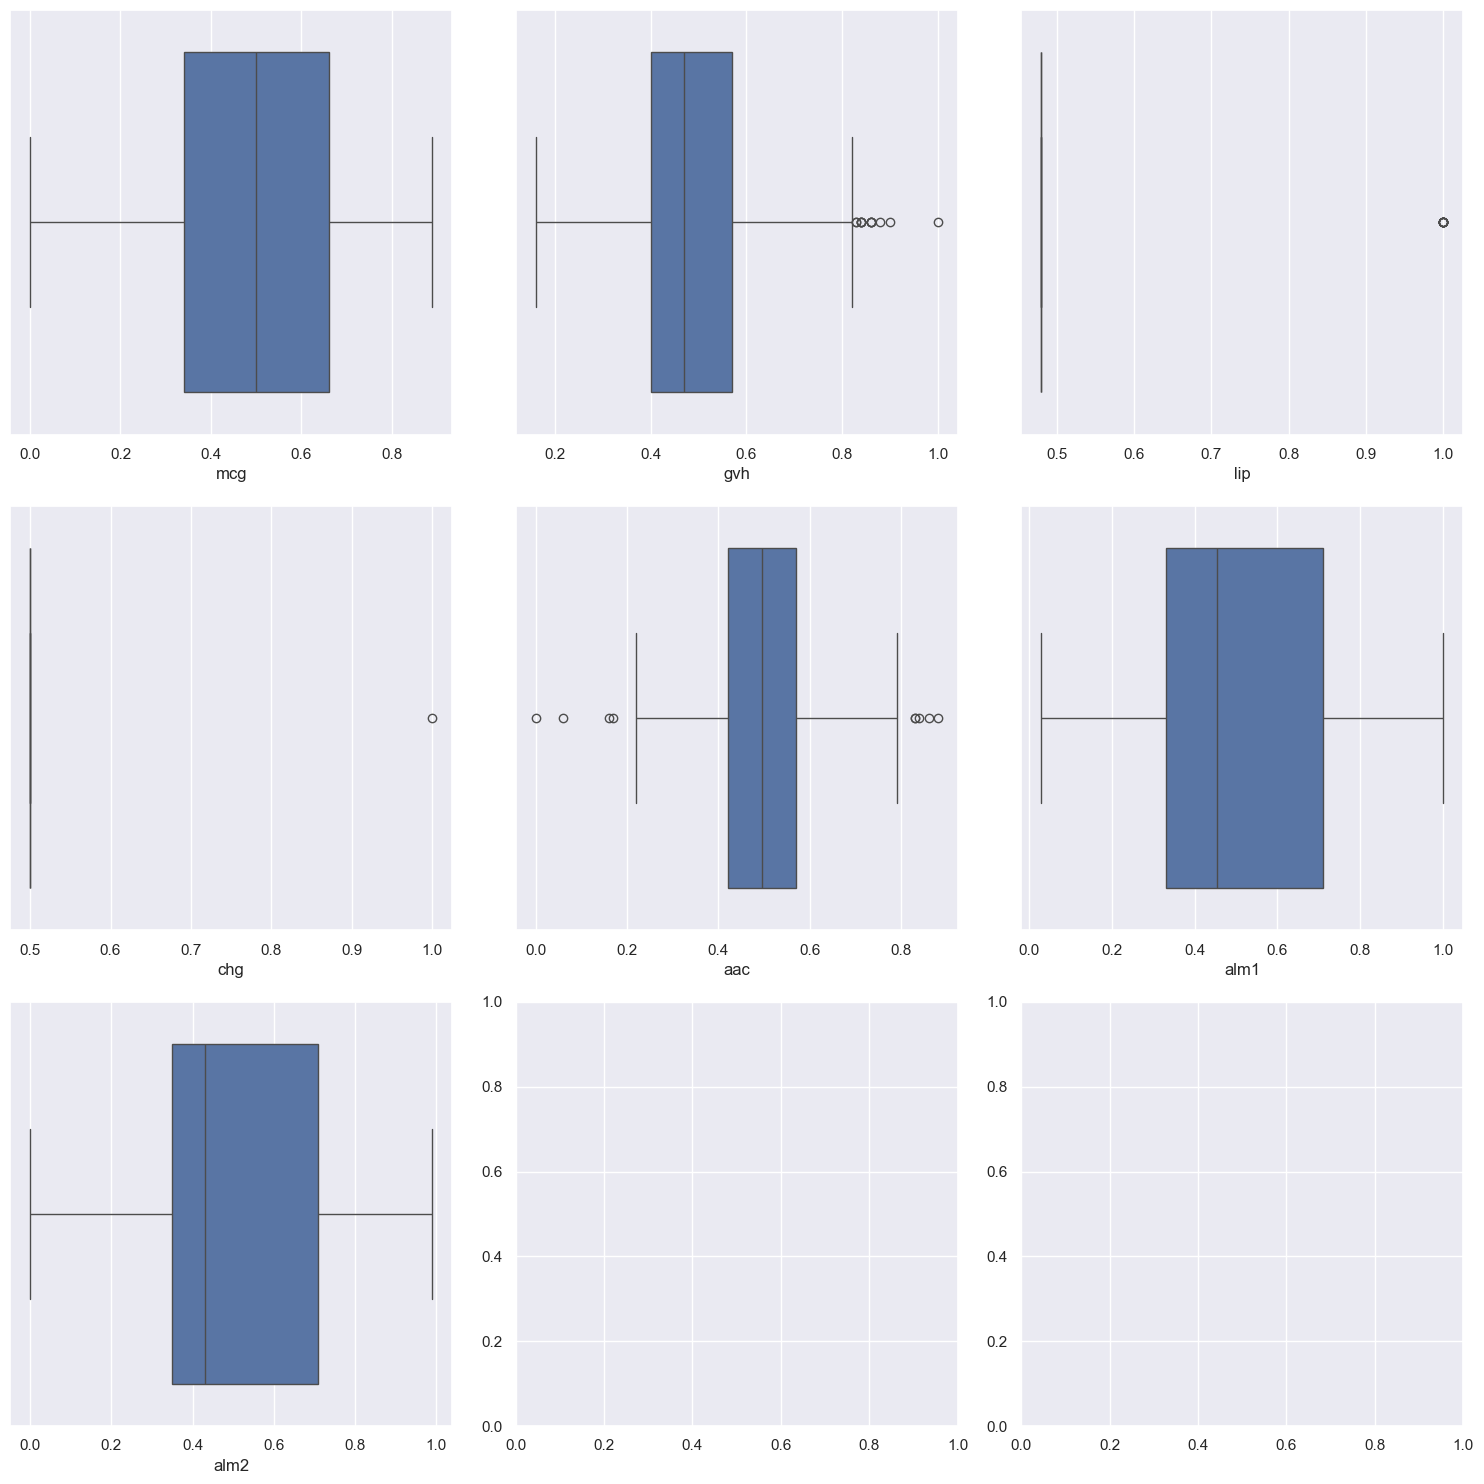

In [6]:
# cek outliers / boxplot

columns = [col for col in df.columns if col != 'class']
n = len(columns)
n_cols = 3
nrows = n // n_cols if n % n_cols == 0 else n // n_cols + 1

fig, axs = plt.subplots(nrows, n_cols, figsize=(15, 15))

for i, col in enumerate(columns):
    row = i//n_cols
    col = i % n_cols
    sns.boxplot(x=df[columns[i]],ax=axs[row, col])

plt.tight_layout()
plt.show()

/tmp/ipykernel_85232/3312131744.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns[i]], ax=axs[row, col])
/tmp/ipykernel_85232/3312131744.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns[i]], ax=axs[row, col])
/tmp/ipykernel_85232/3312131744.py:6: UserWarning: 

`distpl

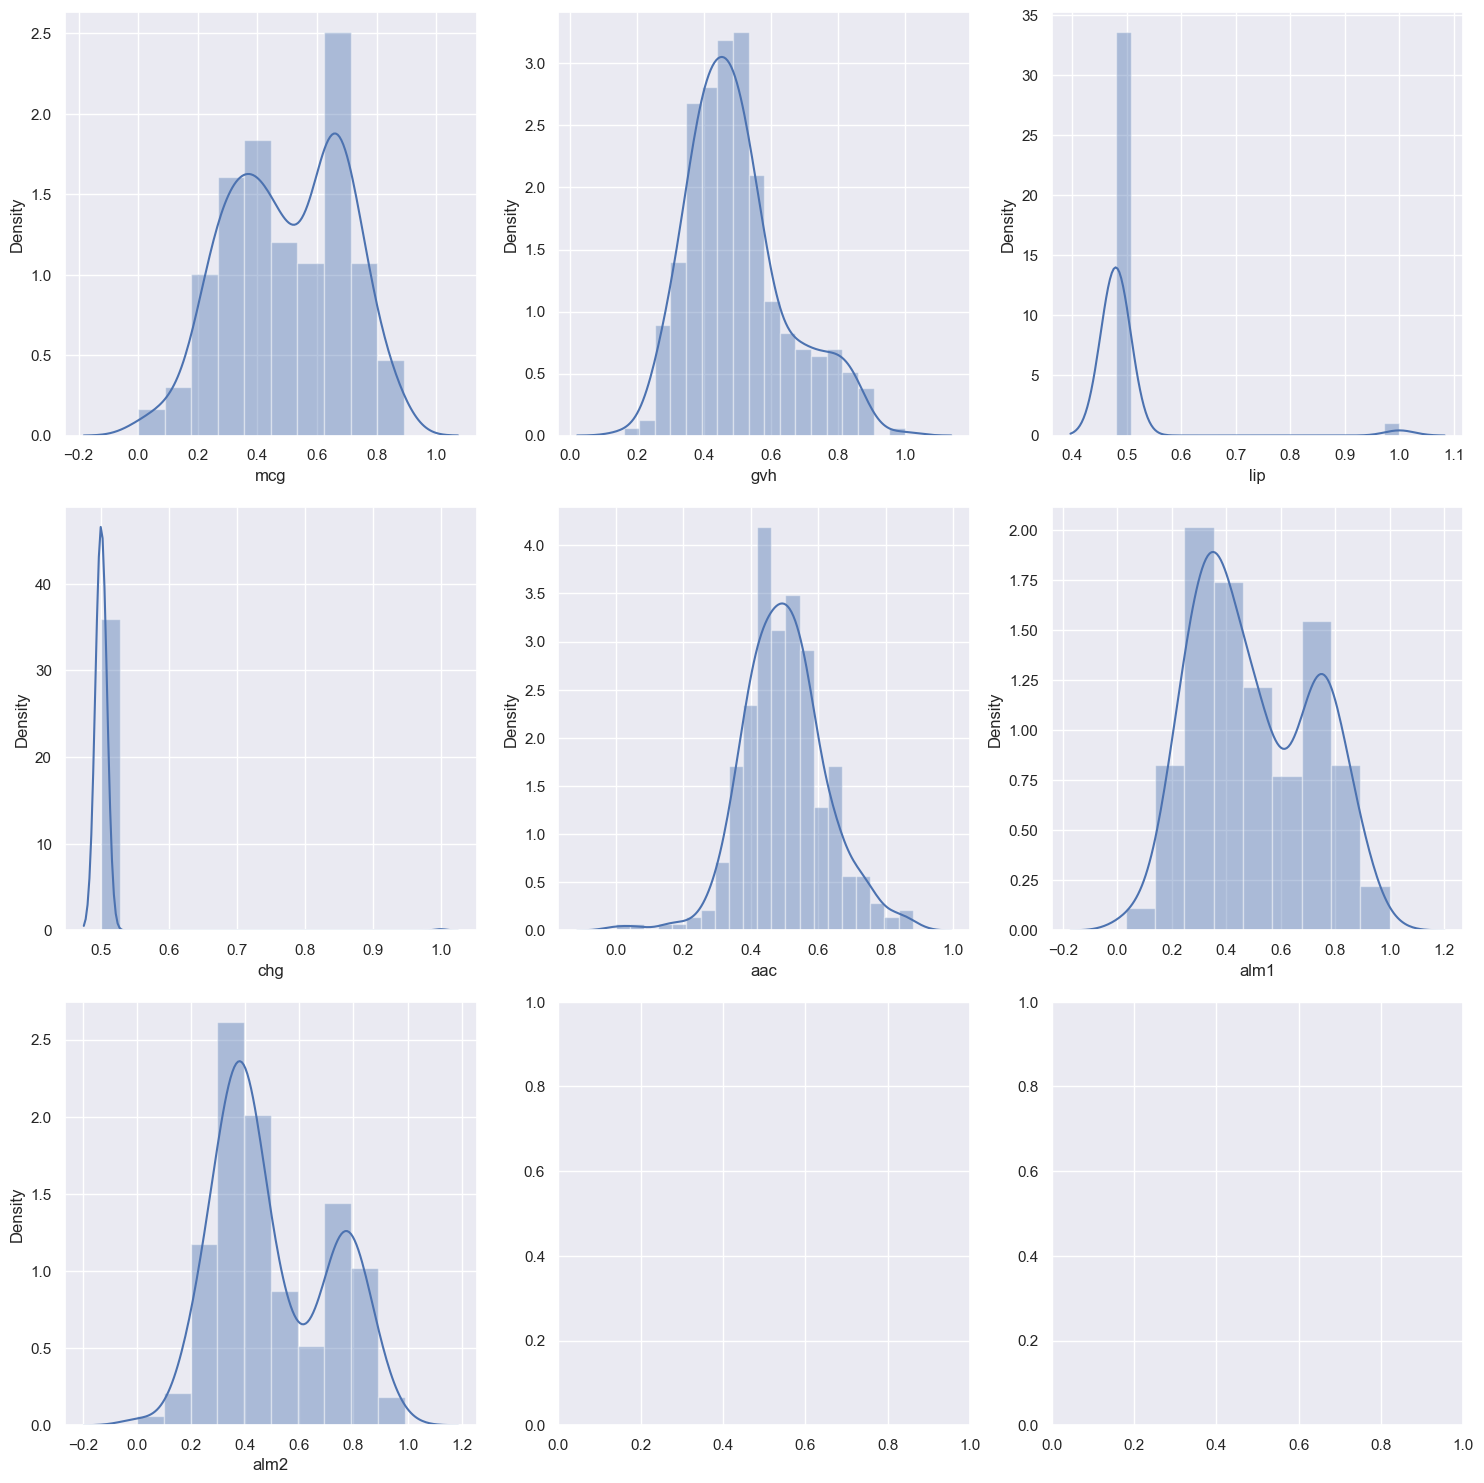

In [7]:
fig, axs = plt.subplots(nrows=nrows, ncols=n_cols, figsize=(15, 15))

for i, col in enumerate(columns):
    row = i // n_cols
    col = i % n_cols
    sns.distplot(df[columns[i]], ax=axs[row, col])

plt.tight_layout()
plt.show()

In [9]:
#split x dan y
X = df.copy().drop('class', axis=1)
Y = df['class']

In [10]:
X

,mcg,gvh,lip,chg,aac,alm1,alm2
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35
...,...,...,...,...,...,...,...
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37


In [11]:
Y

0      b'cp'
1      b'cp'
2      b'cp'
3      b'cp'
4      b'cp'
       ...  
331    b'pp'
332    b'pp'
333    b'pp'
334    b'pp'
335    b'pp'
Name: class, Length: 336, dtype: object

In [12]:
#normalisasi
scaler = StandardScaler()
df_standard = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [13]:
df_standard

,mcg,gvh,lip,chg,aac,alm1,alm2
0,-0.051761,-1.419531,-0.175142,-0.054636,0.490781,-1.207717,-0.716084
1,-2.212876,-0.675967,-0.175142,-0.054636,0.327106,-0.697111,-0.285665
2,0.308424,-0.675967,-0.175142,-0.054636,-0.082081,-0.604273,-0.190016
3,0.462790,-0.067597,-0.175142,-0.054636,0.163431,-0.232923,-0.668259
4,-1.389594,-1.216741,-0.175142,-0.054636,0.408944,-1.161299,-0.716084
...,...,...,...,...,...,...,...
331,1.234617,0.405580,-0.175142,-0.054636,-0.245756,0.834709,-0.955205
332,1.080251,0.473177,-0.175142,-0.054636,-0.163918,-0.697111,-0.859557
333,0.565700,0.675967,-0.175142,-0.054636,-0.491268,-0.511436,-0.572611
334,0.462790,0.743564,-0.175142,-0.054636,-0.654943,-0.372179,-0.620435


In [14]:
df_standard['class'] = Y
df_standard

,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,-0.051761,-1.419531,-0.175142,-0.054636,0.490781,-1.207717,-0.716084,b'cp'
1,-2.212876,-0.675967,-0.175142,-0.054636,0.327106,-0.697111,-0.285665,b'cp'
2,0.308424,-0.675967,-0.175142,-0.054636,-0.082081,-0.604273,-0.190016,b'cp'
3,0.462790,-0.067597,-0.175142,-0.054636,0.163431,-0.232923,-0.668259,b'cp'
4,-1.389594,-1.216741,-0.175142,-0.054636,0.408944,-1.161299,-0.716084,b'cp'
...,...,...,...,...,...,...,...,...
331,1.234617,0.405580,-0.175142,-0.054636,-0.245756,0.834709,-0.955205,b'pp'
332,1.080251,0.473177,-0.175142,-0.054636,-0.163918,-0.697111,-0.859557,b'pp'
333,0.565700,0.675967,-0.175142,-0.054636,-0.491268,-0.511436,-0.572611,b'pp'
334,0.462790,0.743564,-0.175142,-0.054636,-0.654943,-0.372179,-0.620435,b'pp'


In [15]:
#convert class to numerik
dictio_cnvrt_class = {"b'cp'":0, "b'im'":1, "b'pp'":2, "b'imU'":3, "b'om'":4, "b'omL'":5, "b'imL'":6, "b'imS'":7}
df_standard['class'] = df_standard['class'].map(dictio_cnvrt_class)
df_standard

,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,-0.051761,-1.419531,-0.175142,-0.054636,0.490781,-1.207717,-0.716084,0
1,-2.212876,-0.675967,-0.175142,-0.054636,0.327106,-0.697111,-0.285665,0
2,0.308424,-0.675967,-0.175142,-0.054636,-0.082081,-0.604273,-0.190016,0
3,0.462790,-0.067597,-0.175142,-0.054636,0.163431,-0.232923,-0.668259,0
4,-1.389594,-1.216741,-0.175142,-0.054636,0.408944,-1.161299,-0.716084,0
...,...,...,...,...,...,...,...,...
331,1.234617,0.405580,-0.175142,-0.054636,-0.245756,0.834709,-0.955205,2
332,1.080251,0.473177,-0.175142,-0.054636,-0.163918,-0.697111,-0.859557,2
333,0.565700,0.675967,-0.175142,-0.054636,-0.491268,-0.511436,-0.572611,2
334,0.462790,0.743564,-0.175142,-0.054636,-0.654943,-0.372179,-0.620435,2


In [16]:
df_standard.to_csv('dataset/dataset_39_ecoli_standard.csv', index=False)